In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dataset_eda.csv')
df.head()

,Player,Nation,Age,Pos,Squad,Comp,MP,Starts,Min,90s,...,Att Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Live_stats_possession,Rec,Won,Lost,Cmp,Clr
0,Brenden Aaronson,us USA,25.0,"FW,MF",Leeds United,eng Premier League,13,9,791,8.8,...,22,64,163,147,368,209,6,13,178,10
1,Jones El-Abdellaoui,ma MAR,19.0,"MF,FW",Celta Vigo,es La Liga,7,0,139,1.5,...,5,8,24,56,87,63,2,3,43,5
2,Himad Abdelli,dz ALG,26.0,MF,Angers,fr Ligue 1,11,9,764,8.5,...,7,157,357,90,593,421,8,3,422,10
3,Ali Abdi,tn TUN,31.0,"DF,MF",Nice,fr Ligue 1,7,5,353,3.9,...,4,45,65,48,157,88,5,2,85,9
4,Salis Abdul Samed,gh GHA,25.0,MF,Nice,fr Ligue 1,10,7,485,5.4,...,3,64,198,31,292,216,4,3,242,3


In [22]:
fatigue_vars = [
    'Min',          # volumen
    '90s',          # exposición
    'Carries',      # esfuerzo con balón
    'PrgDist',      # intensidad
    'Tkl+Int'       # carga defensiva
]

df_fatigue = df[fatigue_vars].copy()

In [23]:

scaler = StandardScaler()
fatigue_scaled = scaler.fit_transform(df_fatigue)

df_fatigue_scaled = pd.DataFrame(
    fatigue_scaled,
    columns=fatigue_vars
)


In [24]:
weights = np.array([0.25, 0.15, 0.20, 0.25, 0.15])

df['FatigueIndex'] = (df_fatigue_scaled * weights).sum(axis=1)

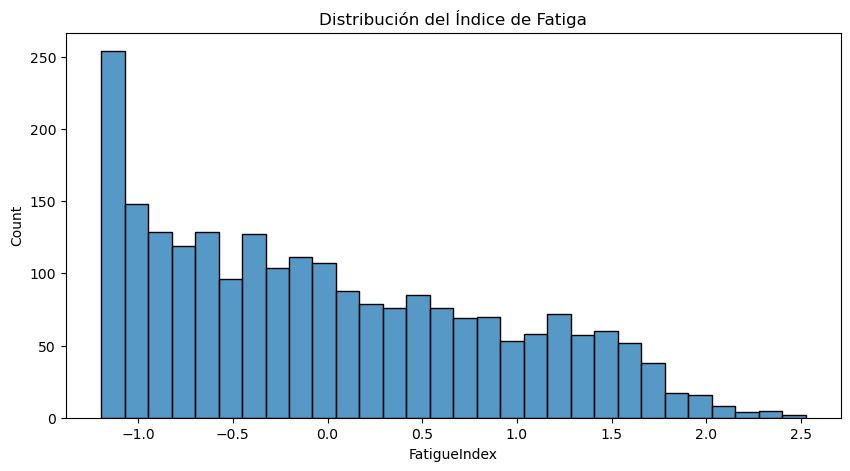

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df['FatigueIndex'], bins=30)
plt.title('Distribución del Índice de Fatiga')
plt.show()


In [26]:
df.to_csv('dataset_con_fatiga.csv', index=False)